# 8. Introducción a Deep Learning.

Profesor: Daniel Aguirre

In [1]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import RootMeanSquaredError

In [2]:
TRAIN_DATA_PATH = 'sample_data/california_housing_train.csv'
TEST_DATA_PATH = 'sample_data/california_housing_test.csv'
TARGET_NAME = 'median_house_value'

In [3]:
train_data = pd.read_csv(TRAIN_DATA_PATH)[["total_rooms", "population", "median_income", TARGET_NAME]]
test_data = pd.read_csv(TEST_DATA_PATH)[["total_rooms", "population", "median_income", TARGET_NAME]]
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

In [4]:
standard_scaler = StandardScaler()
x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns)

# Crear red neuronal

In [6]:
red_neuronal = Sequential([Input(shape=(3,)),
  Dense(units=4, kernel_initializer='normal', activation='relu'), # 1 Capa dansa
  Dense(1, kernel_initializer='normal')
])

In [7]:
red_neuronal.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

# Entrenamiento

In [8]:
red_neuronal.compile(
    loss=MeanSquaredLogarithmicError(),
    optimizer=SGD(learning_rate=0.09),
    metrics=[RootMeanSquaredError()]
)

In [9]:
history = red_neuronal.fit(
    x_train_scaled.values,
    y_train.values,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 68.6911 - root_mean_squared_error: 225768.8438 - val_loss: 37.7021 - val_root_mean_squared_error: 277151.6250
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 32.7273 - root_mean_squared_error: 225105.0156 - val_loss: 30.3127 - val_root_mean_squared_error: 276778.8438
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.8533 - root_mean_squared_error: 226049.3438 - val_loss: 26.4983 - val_root_mean_squared_error: 276435.8438
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.6476 - root_mean_squared_error: 226708.5156 - val_loss: 23.9937 - val_root_mean_squared_error: 276112.2500
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21.3223 - root_mean_squared_error: 224257.7656 - val_loss: 22.1597 - val_root_mean_squared_error: 275803.0000
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.7532 - root_mean_squared_error: 224543.7188 - val_loss: 20.7287 - val_root_mean_squared

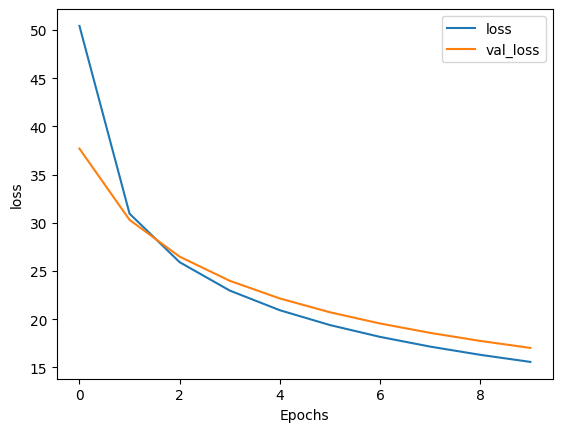

In [10]:
key =  'loss'
plt.plot(history.history[key])
plt.plot(history.history['val_'+key])
plt.xlabel("Epochs")
plt.ylabel(key)
plt.legend([key, 'val_'+key])
plt.show()

# Inferencia

In [11]:
x_test_scaled = standard_scaler.transform(x_test)

In [12]:
y_pred = red_neuronal.predict(x_test_scaled)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [13]:
results = y_test.to_frame()

In [14]:
results["median_house_value_predicho"] = y_pred

In [15]:
results

,median_house_value,median_house_value_predicho
0,344700.0,3660.756592
1,176500.0,3498.471436
2,270500.0,3628.846924
3,330000.0,3519.293701
4,81700.0,3477.526367
...,...,...
2995,225000.0,3448.649658
2996,237200.0,3691.930908
2997,62000.0,3444.593018
2998,162500.0,3428.060791


In [16]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

In [17]:
100*mean_absolute_percentage_error(y_true=results['median_house_value'],y_pred=results['median_house_value_predicho'])

97.67194131075867

# Resumen

Epoch 1/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 68.6900 - root_mean_squared_error: 227253.1719 - val_loss: 37.6127 - val_root_mean_squared_error: 277148.3125
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 32.6220 - root_mean_squared_error: 224046.3750 - val_loss: 30.2705 - val_root_mean_squared_error: 276775.5000
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 26.7633 - root_mean_squared_error: 223865.5625 - val_loss: 26.4710 - val_root_mean_squared_error: 276432.4375
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23.5033 - root_mean_squared_error: 225215.8594 - val_loss: 23.9739 - val_root_mean_squared_error: 276108.8750
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21.2637 - root_mean_squared_error: 222470.4219 - val_loss: 22.1441 - val_root_mean_squared_error: 275799.6562
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 19.7940 - root_mean_squared_error: 226492.5156 - val_loss: 20.7160 - val_root_mean_square

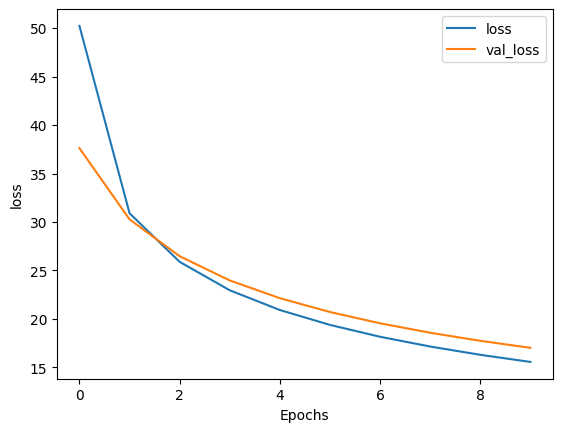

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 En evaluación, el modelo, en promedio, se desvía un 97.67% de las observaciones reales


In [19]:
red_neuronal = Sequential([Input(shape=(3,)),
  Dense(units=4, kernel_initializer='normal', activation='relu'), # 1 Capa dansa
  Dense(1, kernel_initializer='normal')
])

red_neuronal.compile(
    loss=MeanSquaredLogarithmicError(),
    optimizer=SGD(learning_rate=0.09),
    metrics=[RootMeanSquaredError()]
)
history = red_neuronal.fit(
    x_train_scaled.values,
    y_train.values,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

key =  'loss'
plt.plot(history.history[key])
plt.plot(history.history['val_'+key])
plt.xlabel("Epochs")
plt.ylabel(key)
plt.legend([key, 'val_'+key])
plt.show()

x_test_scaled = standard_scaler.transform(x_test)
y_pred = red_neuronal.predict(x_test_scaled)
mape = mean_absolute_percentage_error(y_true=y_test,y_pred=y_pred)
print(f" En evaluación, el modelo, en promedio, se desvía un {round(mape*100, 2)}% de las observaciones reales")

In [20]:
results = y_test.to_frame()

In [21]:
results["median_house_value_predicho"] = y_pred

In [22]:
results

,median_house_value,median_house_value_predicho
0,344700.0,3665.592773
1,176500.0,3501.101074
2,270500.0,3633.043213
3,330000.0,3524.327881
4,81700.0,3479.846191
...,...,...
2995,225000.0,3449.851318
2996,237200.0,3696.323242
2997,62000.0,3446.207275
2998,162500.0,3430.152832


# Regularización

La regularización L1 y L2 se agrega en la creación de la arquitectura. De la misma forma Dropout.

In [23]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

In [25]:
red_neuronal = Sequential([Input(shape=(3,)),
  Dense(units=4,
        kernel_initializer='normal',
        activation='relu',
        kernel_regularizer=regularizers.L1(1e-5)),
  Dropout(0.5),
  Dense(1, kernel_initializer='normal')
])

EarlyStopping se implementa como un callback. Esto va en el entrenamiento del modelo.

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
red_neuronal.compile(
    loss=MeanSquaredLogarithmicError(),
    optimizer=SGD(learning_rate=0.09),
    metrics=[RootMeanSquaredError()]
)

In [28]:
history = red_neuronal.fit(
    x_train_scaled.values,
    y_train.values,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor="val_loss", patience=3)]
)

Epoch 1/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 74.9738 - root_mean_squared_error: 227312.9531 - val_loss: 38.9570 - val_root_mean_squared_error: 277191.8125
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.1407 - root_mean_squared_error: 225909.5312 - val_loss: 31.1578 - val_root_mean_squared_error: 276837.1250
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.1349 - root_mean_squared_error: 225843.8125 - val_loss: 27.2008 - val_root_mean_squared_error: 276510.4062
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 28.5732 - root_mean_squared_error: 225218.9062 - val_loss: 24.6137 - val_root_mean_squared_error: 276201.3125
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 26.5465 - root_mean_squared_error: 224837.1875 - val_loss: 22.7308 - val_root_mean_squared_error: 275906.5312
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 24.5099 - root_mean_squared_error: 222899.1562 - val_loss: 21.2637 - val_root_mean_squared

# Ejercicio clasificación

Cargar el archivo "cancer.csv" en los archivos de colab. Estos son datos de tumores malignos y benignos de cancer de mama.

In [29]:
import pandas as pd

df = pd.read_csv("sample_data/cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
